## **Importing Libraries**

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

1. **`tensorflow` and `keras`:** Core frameworks for machine learning and deep learning.
2. **`Sequential`:** A linear stack of layers to build a model layer by layer.
3. **`Dense`:** A fully connected layer in a neural network.
4. **`Conv2D`:** A convolutional layer for processing image data.
5. **`MaxPool2D`:** A max pooling layer for down-sampling image data.
6. **`Flatten`:** A layer to convert multidimensional data into a 1D vector, typically used before feeding data into a dense layer.

## **Image Data Loading**

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='Datasets/train',        # Path to the directory containing images.
    labels='inferred',                # Labels are inferred from the folder names.
    label_mode='int',                 # Labels are provided as integers (e.g., 0, 1, 2).
    batch_size=32,                    # Each batch will contain 32 images.
    image_size=(256, 256)             # Resizes each image to 256x256 pixels.
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='Datasets/test',        # Path to the same directory for validation 
    labels='inferred',                # Labels are inferred from the folder names.
    label_mode='int',                 # Labels are provided as integers (e.g., 0, 1, 2).
    batch_size=32,                    # Each batch will contain 32 images.
    image_size=(256, 256)             # Resizes each image to 256x256 pixels.
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


### Explanation of Parameters Used:
1. **`directory='Datasets/test'`**  
   - The path where the image data is stored. Each subdirectory in this folder represents a class label.
   
2. **`labels='inferred'`**  
   - The labels are automatically assigned based on the names of the subdirectories (e.g., `cat`, `dog`).

3. **`label_mode='int'`**  
   - Labels will be returned as integers (e.g., `0` for `cat`, `1` for `dog`).

4. **`batch_size=32`**  
   - The number of images processed together in each training or validation step.

5. **`image_size=(256, 256)`**  
   - Resizes all images to a uniform size of 256x256 pixels for consistent input to the model.


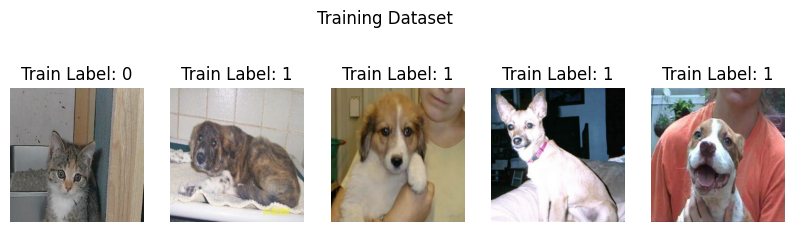

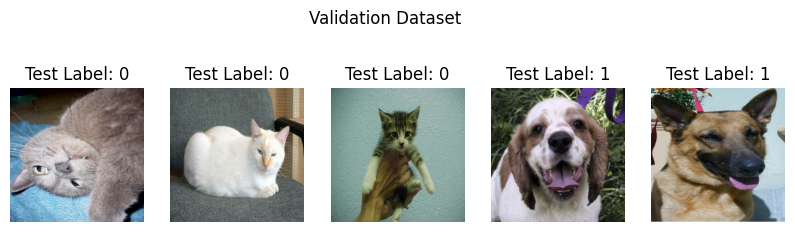

In [22]:
import matplotlib.pyplot as plt

# Display the first batch of 5 images from train_ds
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 3))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Train Label: {labels[i].numpy()}")
        plt.axis('off')
    plt.suptitle("Training Dataset")  # Title for train images
    plt.show()

# Display the first batch of 5 images from validation_ds
for images, labels in validation_ds.take(1):
    plt.figure(figsize=(10, 3))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Test Label: {labels[i].numpy()}")
        plt.axis('off')
    plt.suptitle("Validation Dataset")  # Title for test images
    plt.show()


- **Loop through `train_ds.take(1)`**: Retrieves the first batch of images and labels from the training dataset.
- **Create figure with `plt.figure(figsize=(10, 3))`**: Defines the figure size for displaying images in a row.
- **Loop through 5 images**: Loops through the first 5 images in the batch to display.
- **Create subplots with `plt.subplot(1, 5, i+1)`**: Organizes the images in a single row (1 row, 5 columns).
- **Display image with `plt.imshow(images[i].numpy().astype("uint8"))`**: Converts and displays each image.
- **Add title with `plt.title(f"Train Label: {labels[i].numpy()}")`**: Adds the image's label as the title.
- **Hide axis with `plt.axis('off')`**: Removes axis ticks and labels for cleaner display.
- **Add overall title with `plt.suptitle("Training Dataset")`**: Labels the entire figure as "Training Dataset".
- **Display images with `plt.show()`**: Renders the plot with the images.
- **Repeat for `validation_ds`**: Same steps for displaying 5 images from the validation dataset, with "Validation Dataset" title.


## **Normalize**

In [23]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

## **CNN Model**

In [24]:
model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())  # Flatten the output of the convolutional layers

model.add(Dense(128, activation='relu'))  # Fully connected layer with 128 units and ReLU activation
model.add(Dense(64, activation='relu'))  # Fully connected layer with 64 units and ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit and sigmoid activation (for binary classification)

c:\Users\SPPL IT\Desktop\Study\Python\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1. **Model Initialization**: `Sequential()` creates a linear stack of layers where each layer flows into the next.

2. **Convolutional and Pooling Layers**:
   - **First Block**:
     - `Conv2D(32, kernel_size=(3,3), ...)` applies 32 filters of size 3x3 with ReLU activation to extract features. The input image shape is `(256,256,3)`.
     - `MaxPool2D(pool_size=(2,2), strides=2, ...)` reduces the spatial dimensions by half (down-sampling) using 2x2 pooling.
   - **Second and Third Blocks**: These repeat the convolutional and pooling process with increasing filter sizes (64 and 128), allowing the network to learn more complex patterns.

3. **Flattening**: `Flatten()` converts the 2D feature maps into a 1D vector for the fully connected layers.

4. **Fully Connected Layers**:
   - `Dense(128, activation='relu')`: A dense layer with 128 neurons and ReLU activation for learning complex patterns.
   - `Dense(64, activation='relu')`: Another dense layer with 64 neurons and ReLU activation for further learning.

5. **Output Layer**: `Dense(1, activation='sigmoid')` outputs a single value (0 or 1) using the sigmoid activation, suitable for binary classification tasks.

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- **`model.compile()`** prepares the model for training by specifying how the model will learn (`optimizer`), how to measure learning (`loss`), and how to evaluate performance (`metrics`).

1. **Optimizer**: 
   - `'adam'`: The Adam optimizer is used, which combines the benefits of Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp) for efficient and adaptive learning.

2. **Loss Function**:
   - `'binary_crossentropy'`: This is used for binary classification tasks. It measures the difference between predicted probabilities and actual labels, optimizing the model for accurate binary outputs.

3. **Metrics**:
   - `['accuracy']`: Tracks the model's accuracy during training and evaluation, showing the proportion of correct predictions. 

This setup ensures the model trains efficiently for binary classification problems.

In [ ]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1206s 2s/step - accuracy: 0.6007 - loss: 0.6886 - val_accuracy: 0.6768 - val_loss: 0.5730
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1189s 2s/step - accuracy: 0.7415 - loss: 0.5091 - val_accuracy: 0.7892 - val_loss: 0.4545
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1227s 2s/step - accuracy: 0.8121 - loss: 0.4113 - val_accuracy: 0.7942 - val_loss: 0.5031
Epoch 4/10
358/625 ━━━━━━━━━━━━━━━━━━━━ 8:23 2s/step - accuracy: 0.8667 - loss: 0.3060

The `model.fit()` method trains the neural network using the training dataset and evaluates it using the validation dataset during each epoch. Here's what this specific code does:

#### 1. **Training Data** (`train_ds`):
   - `train_ds`: The dataset used to train the model. This contains the input data (features) and corresponding labels (outputs).

#### 2. **Number of Epochs** (`epochs=10`):
   - The model will go through the entire training dataset 10 times to update its weights and minimize the loss.

#### 3. **Validation Data** (`validation_data=validation_ds`):
   - `validation_ds`: A separate dataset that the model uses for evaluation at the end of each epoch. This helps track performance on unseen data and prevents overfitting.

#### 4. **Outputs**:
   - The method returns a `history` object that stores the training process's metrics (e.g., loss and accuracy for both training and validation). You can use it to visualize or analyze the training progress.

### Key Process:
   - For each epoch:
     1. The model computes predictions on `train_ds` and adjusts weights using backpropagation based on the loss function.
     2. It evaluates performance on `validation_ds` without updating weights, providing a measure of generalization.
